# Difference between Hollywood and Bollywood

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from collections import Counter

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('fivethirtyeight')

In [161]:
#Reading the Data
imdbMovies = pd.read_csv('IMDb movies.csv')

#Keeping only USA and India data
imdbMoviesUSA = imdbMovies[imdbMovies['country']=='USA']
imdbMoviesIndia = imdbMovies[imdbMovies['country']=='India']
imdbMovies = pd.concat([imdbMoviesUSA, imdbMoviesIndia])

#Filtering the rows we need
imdbMovies = imdbMovies[['title', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'avg_vote', 'votes']]

#Dropping rows NaN values
imdbMovies = imdbMovies.dropna()

#Data Cleaning
imdbMovies['date_published'] = imdbMovies['date_published'].replace('TV Movie 2019', 2019)
imdbMovies['date_published'] = pd.to_datetime(imdbMovies['date_published'])
imdbMovies['date_published'] = imdbMovies['date_published'].dt.year

#Dropping movies with less than 10,000 votes
imdbMovies = imdbMovies[imdbMovies['votes'] > 10000]

In [162]:
imdbMovies.head()

,title,date_published,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes
47,Nascita di una nazione,1915,"Drama, History, War",195,USA,None,D.W. Griffith,"Thomas Dixon Jr., Thomas Dixon Jr.",David W. Griffith Corp.,"Henry B. Walthall, Lillian Gish, Mae Marsh, Mi...",6.3,22213
76,Intolerance,1918,"Drama, History",163,USA,English,D.W. Griffith,"D.W. Griffith, Anita Loos",Triangle Film Corporation,"Lillian Gish, Mae Marsh, Robert Harron, F.A. T...",7.8,13875
251,Il monello,1923,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",8.3,109038
334,Preferisco l'ascensore,1924,"Action, Comedy, Thriller",74,USA,English,"Fred C. Newmeyer, Sam Taylor","Hal Roach, Sam Taylor",Hal Roach Studios,"Harold Lloyd, Mildred Davis, Bill Strother, No...",8.1,17795
390,La palla n° 13,1924,"Action, Comedy, Romance",45,USA,English,Buster Keaton,"Jean C. Havez, Joseph A. Mitchell",Buster Keaton Productions,"Buster Keaton, Kathryn McGuire, Joe Keaton, Er...",8.2,39634


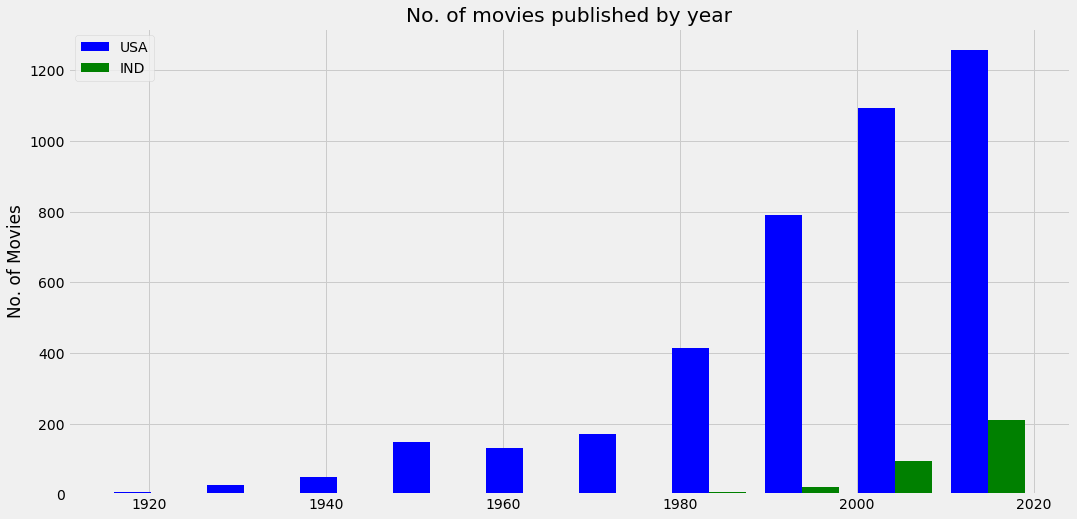

In [192]:
#No of movies published by year

USAyear = imdbMovies[imdbMovies['country']=='USA']['date_published'].values
INDyear = imdbMovies[imdbMovies['country']=='India']['date_published'].values
colors = ['b','g']

#plots the histogram
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.hist([USAyear,INDyear], label=['USA', 'IND'], color=colors)
ax1.set_ylabel("No. of Movies")
ax1.set_title("No. of movies published by year")
plt.legend(loc='upper left')
plt.show()

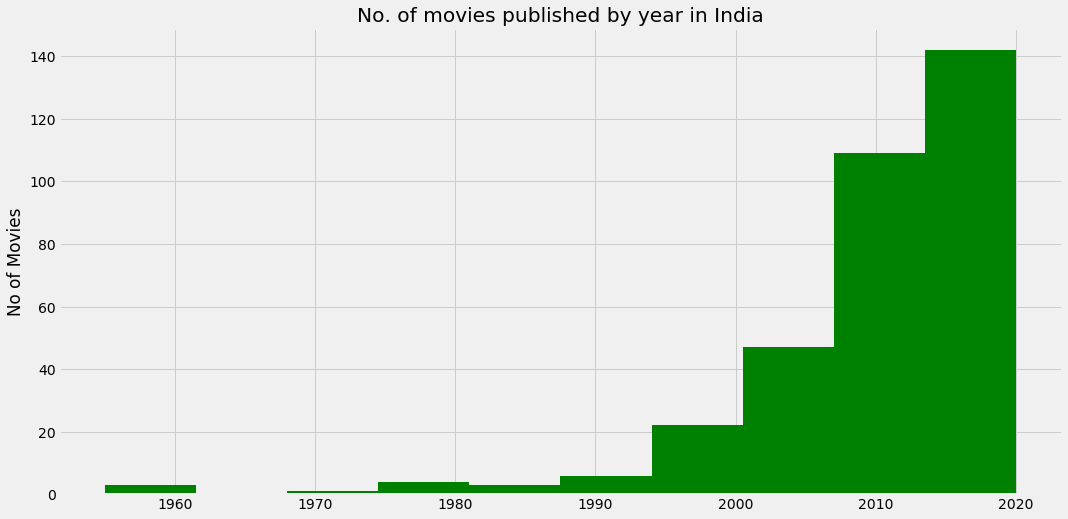

In [438]:
plt.figure(figsize=(16,8))
plt.hist(INDyear, color='green')
plt.title("No. of movies published by year in India")
plt.ylabel("No of Movies")
plt.show()

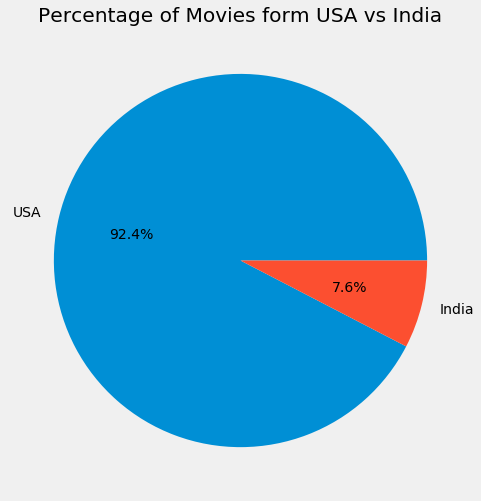

In [208]:
percentageUSA = len(imdbMovies[imdbMovies['country']=='USA'])/len(imdbMovies)*100
percentageIndia = len(imdbMovies[imdbMovies['country']=='India'])/len(imdbMovies)*100
plt.figure(figsize=(16,8))
plt.title("Percentage of Movies form USA vs India")
plt.pie([percentageUSA, percentageIndia], autopct='%1.1f%%', labels=['USA', 'India'])
plt.show()

In [221]:
#Oldest USA and Indian Movie on IMDB
oldestUSAmovie = imdbMovies.sort_values(by='date_published').head(1)['title']
oldestIndianmovie = imdbMovies[imdbMovies['country']=='India'].sort_values(by='date_published').head(1)['title']
print('Oldest USA Movie:',oldestUSAmovie.values)
print('Oldest Indian Movie', oldestIndianmovie.values)

Oldest USA Movie: ['Nascita di una nazione']
Oldest Indian Movie ['Il lamento sul sentiero']


In [367]:
#USA and Indian Movies by Genre

IndiaList = []
USAlist = []

for i in imdbMovies[imdbMovies['country']=='India']['genre']:
    splitList = i.split(',')
    IndiaList.extend(splitList)
    
for i in imdbMovies[imdbMovies['country']=='USA']['genre']:
    splitList = i.split(',')
    USAlist.extend(splitList)
    
for i in range(len(IndiaList)):
    IndiaList[i] = IndiaList[i].strip()
    
for i in range(len(USAlist)):
    USAlist[i] = USAlist[i].strip()
    
genreCountIndia = Counter(IndiaList)
genreCountUSA = Counter(USAlist)

genreCountIndia = pd.DataFrame(data={'Genre': list(genreCountIndia.keys()), 'Count' : list(genreCountIndia.values())})
genreCountUSA = pd.DataFrame(data={'Genre': list(genreCountUSA.keys()), 'Count' : list(genreCountUSA.values())})

for i in range(len(genreCountIndia)):
    if genreCountIndia['Count'][i] < 50: #47.38 is average count
        genreCountIndia['Genre'][i] = 'Other'
        
for i in range(len(genreCountUSA)):
    if genreCountUSA['Count'][i] < 500: #494.04 is average count
        genreCountUSA['Genre'][i] = 'Other'

C:\Users\gavbh\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gavbh\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


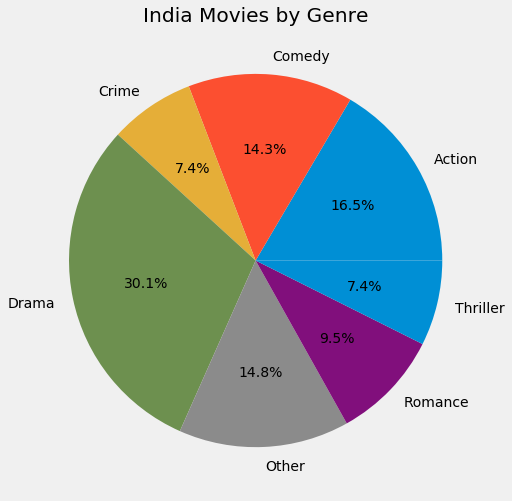

In [365]:
plt.figure(figsize=(16,8))
plt.title("India Movies by Genre")
plt.pie(list(genreCountIndia.groupby('Genre').sum()['Count']), autopct='%1.1f%%', labels=list(genreCountIndia.groupby('Genre').sum()['Count'].index))
plt.show()

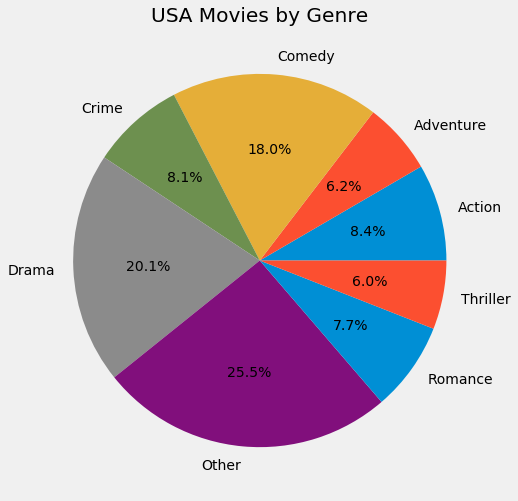

In [366]:
plt.figure(figsize=(16,8))
plt.title("USA Movies by Genre")
plt.pie(list(genreCountUSA.groupby('Genre').sum()['Count']), autopct='%1.1f%%', labels=list(genreCountUSA.groupby('Genre').sum()['Count'].index))
plt.show()

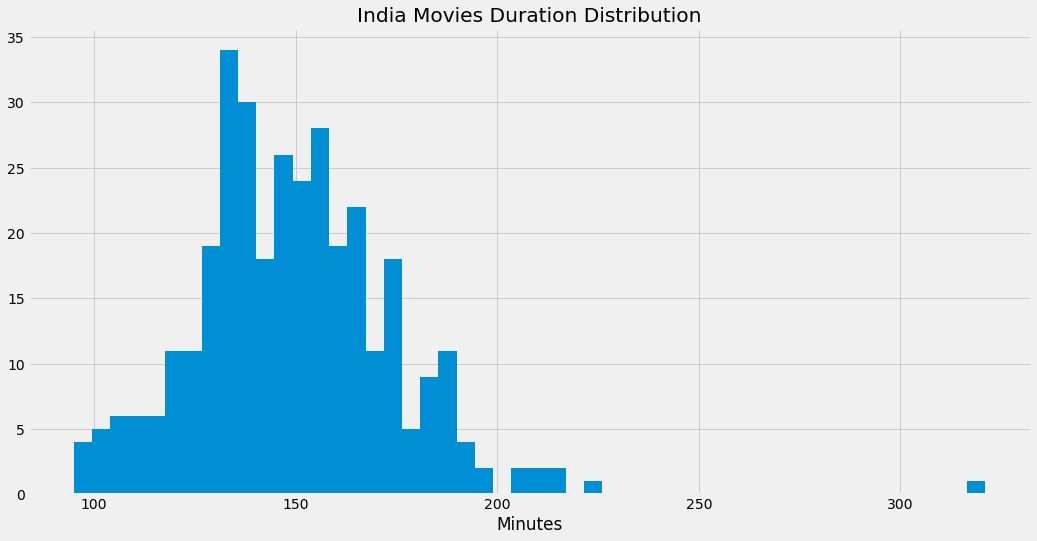

In [372]:
#Average Duration of Indian Movies
plt.figure(figsize=(16,8))
plt.title("India Movies Duration Distribution")
plt.xlabel("Minutes")
plt.hist(imdbMovies[imdbMovies['country']=='India']['duration'], bins = 50)
plt.show()

In [380]:
#Longest and Shortest Indian Movie on IMDB
shortestIndianMovie = imdbMovies[imdbMovies['country']=='India'].sort_values(by='duration').head(1)['title']
longestIndianMovie = imdbMovies[imdbMovies['country']=='India'].sort_values(by='duration').tail(1)['title']
print('Average Indian Movie Duration: ', imdbMovies[imdbMovies['country']=='India']['duration'].mean(), 'min')
print('Shortest Indian Movie:',shortestIndianMovie.values)
print('Longest Indian Movie:', longestIndianMovie.values)

Average Indian Movie Duration:  149.44213649851633 min
Shortest Indian Movie: ['Tere Bin Laden']
Longest Indian Movie: ['Gangs of Wasseypur']


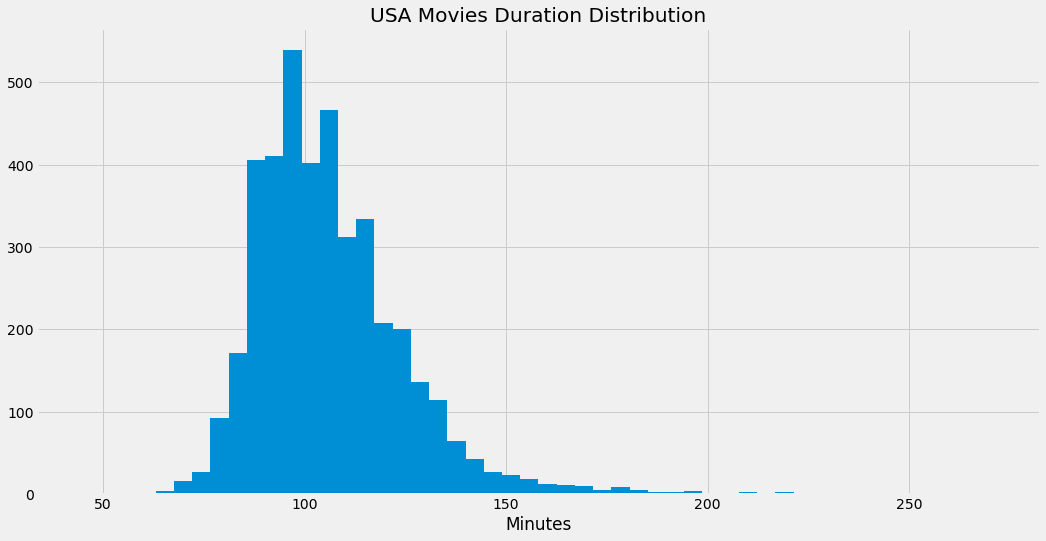

In [373]:
#Average Duration of USA Movies
plt.figure(figsize=(16,8))
plt.title("USA Movies Duration Distribution")
plt.xlabel("Minutes")
plt.hist(imdbMovies[imdbMovies['country']=='USA']['duration'], bins = 50)
plt.show()

In [381]:
#Longest and Shortest USA Movie on IMDB
shortestUSAMovie = imdbMovies[imdbMovies['country']=='USA'].sort_values(by='duration').head(1)['title']
longestUSAMovie = imdbMovies[imdbMovies['country']=='USA'].sort_values(by='duration').tail(1)['title']
print('Average USA Movie Duration: ', imdbMovies[imdbMovies['country']=='USA']['duration'].mean(), 'min')
print('Shortest USA Movie:',shortestUSAMovie.values)
print('Longest USA Movie:', longestUSAMovie.values)

Average USA Movie Duration:  106.32958435207824 min
Shortest USA Movie: ['La palla n° 13']
Longest USA Movie: ['Gettysburg']


In [383]:
#Most active USA and Indian Actors

IndianActors = []
UsaActors = []

for i in imdbMovies[imdbMovies['country']=='India']['actors']:
    splitList = i.split(',')
    IndianActors.extend(splitList)
    
for i in imdbMovies[imdbMovies['country']=='USA']['actors']:
    splitList = i.split(',')
    UsaActors.extend(splitList)
    
for i in range(len(IndianActors)):
    IndianActors[i] = IndianActors[i].strip()
    
for i in range(len(UsaActors)):
    UsaActors[i] = UsaActors[i].strip()
    
actorCountIndia = Counter(IndianActors)
actorCountUSA = Counter(UsaActors)

actorCountIndia = pd.DataFrame(data={'Actor': list(actorCountIndia.keys()), 'Appearances' : list(actorCountIndia.values())})
actorCountUSA = pd.DataFrame(data={'Actor': list(actorCountUSA.keys()), 'Appearances' : list(actorCountUSA.values())})

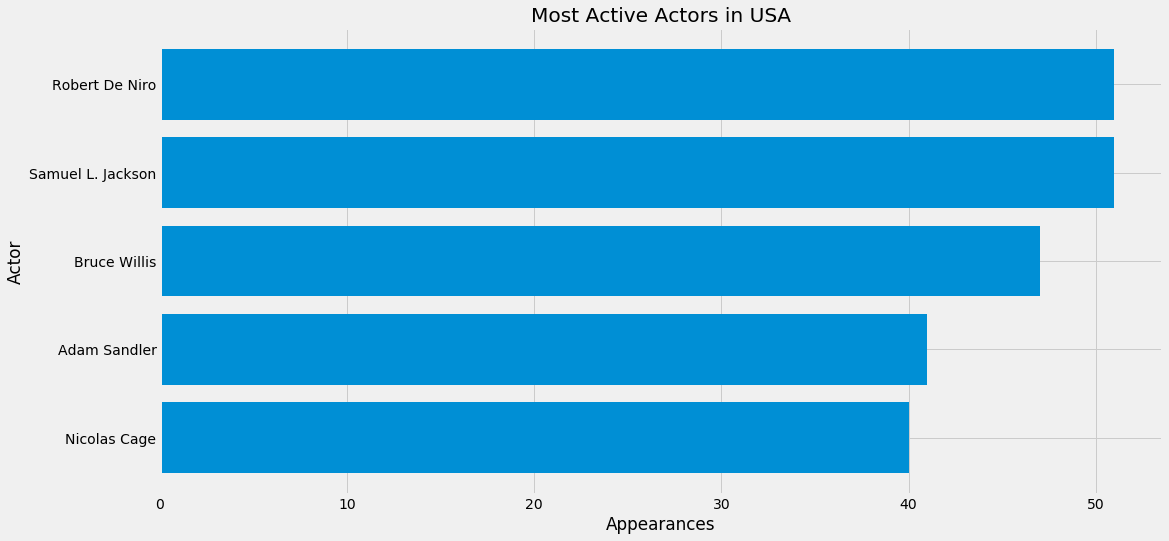

In [437]:
plt.figure(figsize=(16,8))
plt.barh(actorCountUSA.sort_values(by='Appearances', ascending = True)[-5:]['Actor'], actorCountUSA.sort_values(by='Appearances', ascending = True)[-5:]['Appearances'])
plt.title('Most Active Actors in USA')
plt.ylabel('Actor')
plt.xlabel('Appearances')
plt.show()

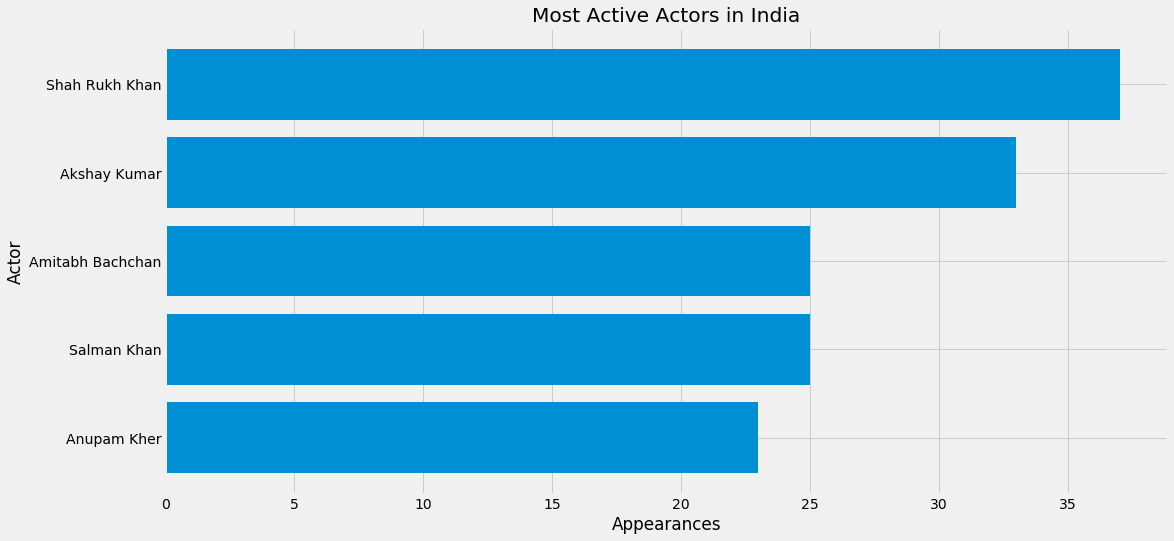

In [436]:
plt.figure(figsize=(16,8))
plt.barh(actorCountIndia.sort_values(by='Appearances', ascending = True)[-5:]['Actor'], actorCountIndia.sort_values(by='Appearances', ascending = True)[-5:]['Appearances'])
plt.title('Most Active Actors in India')
plt.ylabel('Actor')
plt.xlabel('Appearances')
plt.show()

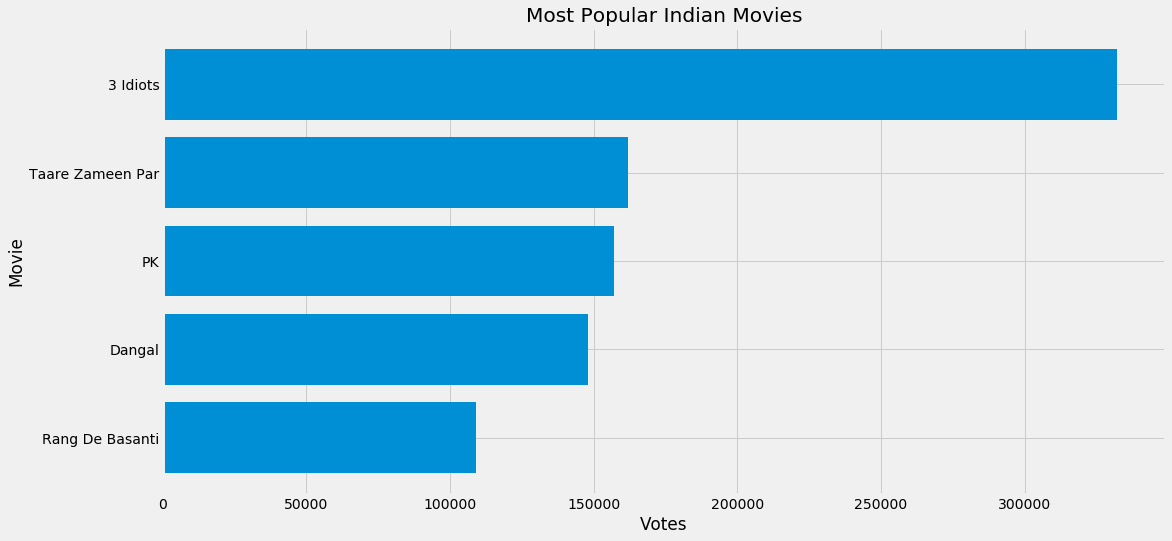

In [435]:
plt.figure(figsize=(16,8))
plt.barh(imdbMovies[imdbMovies['country']=='India'].sort_values(by='votes', ascending = True)[-5:]['title'], imdbMovies[imdbMovies['country']=='India'].sort_values(by='votes', ascending = True)[-5:]['votes'])
plt.title('Most Popular Indian Movies')
plt.ylabel('Movie')
plt.xlabel('Votes')
plt.show()

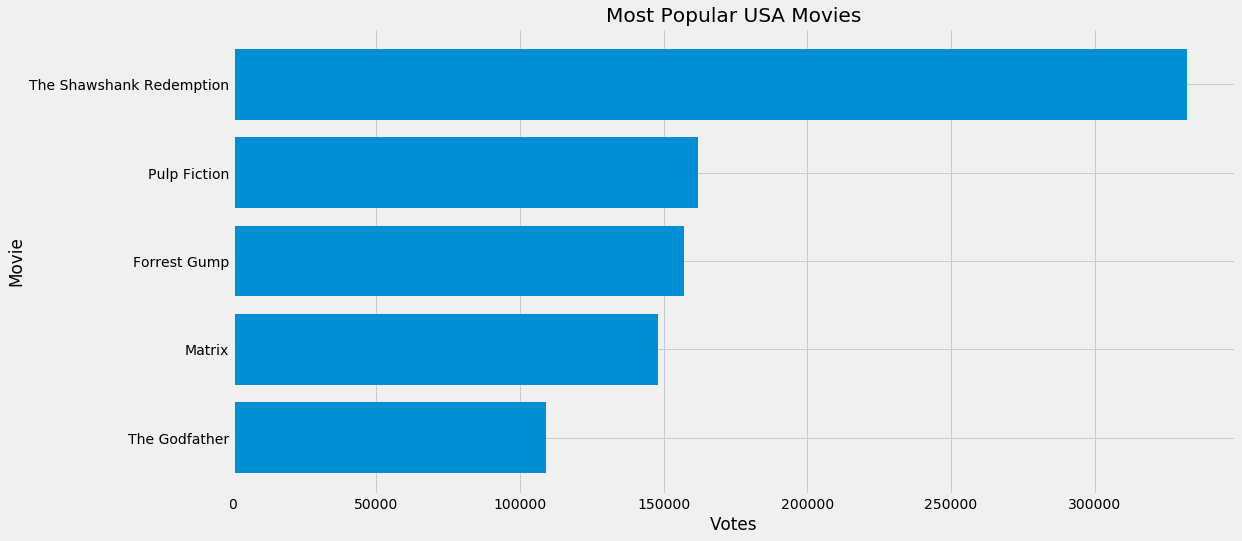

In [434]:
plt.figure(figsize=(16,8))
plt.barh(imdbMovies[imdbMovies['country']=='USA'].sort_values(by='votes', ascending = True)[-5:]['title'], imdbMovies[imdbMovies['country']=='India'].sort_values(by='votes', ascending = True)[-5:]['votes'])
plt.title('Most Popular USA Movies')
plt.ylabel('Movie')
plt.xlabel('Votes')
plt.show()